### Train the Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
steeldata = pd.read_csv("C:/Users/Creacion Tech/Documents/Steel_industry_data.csv")

In [3]:
steeldata.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
steeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

<AxesSubplot:>

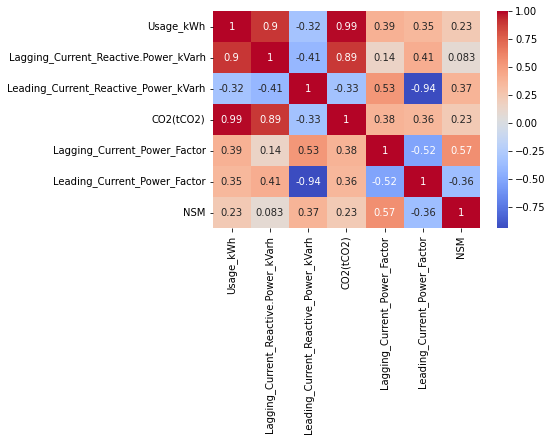

In [5]:
#EDA: data analysis: correlation and heatmap
import seaborn as sns

df_corr = steeldata.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

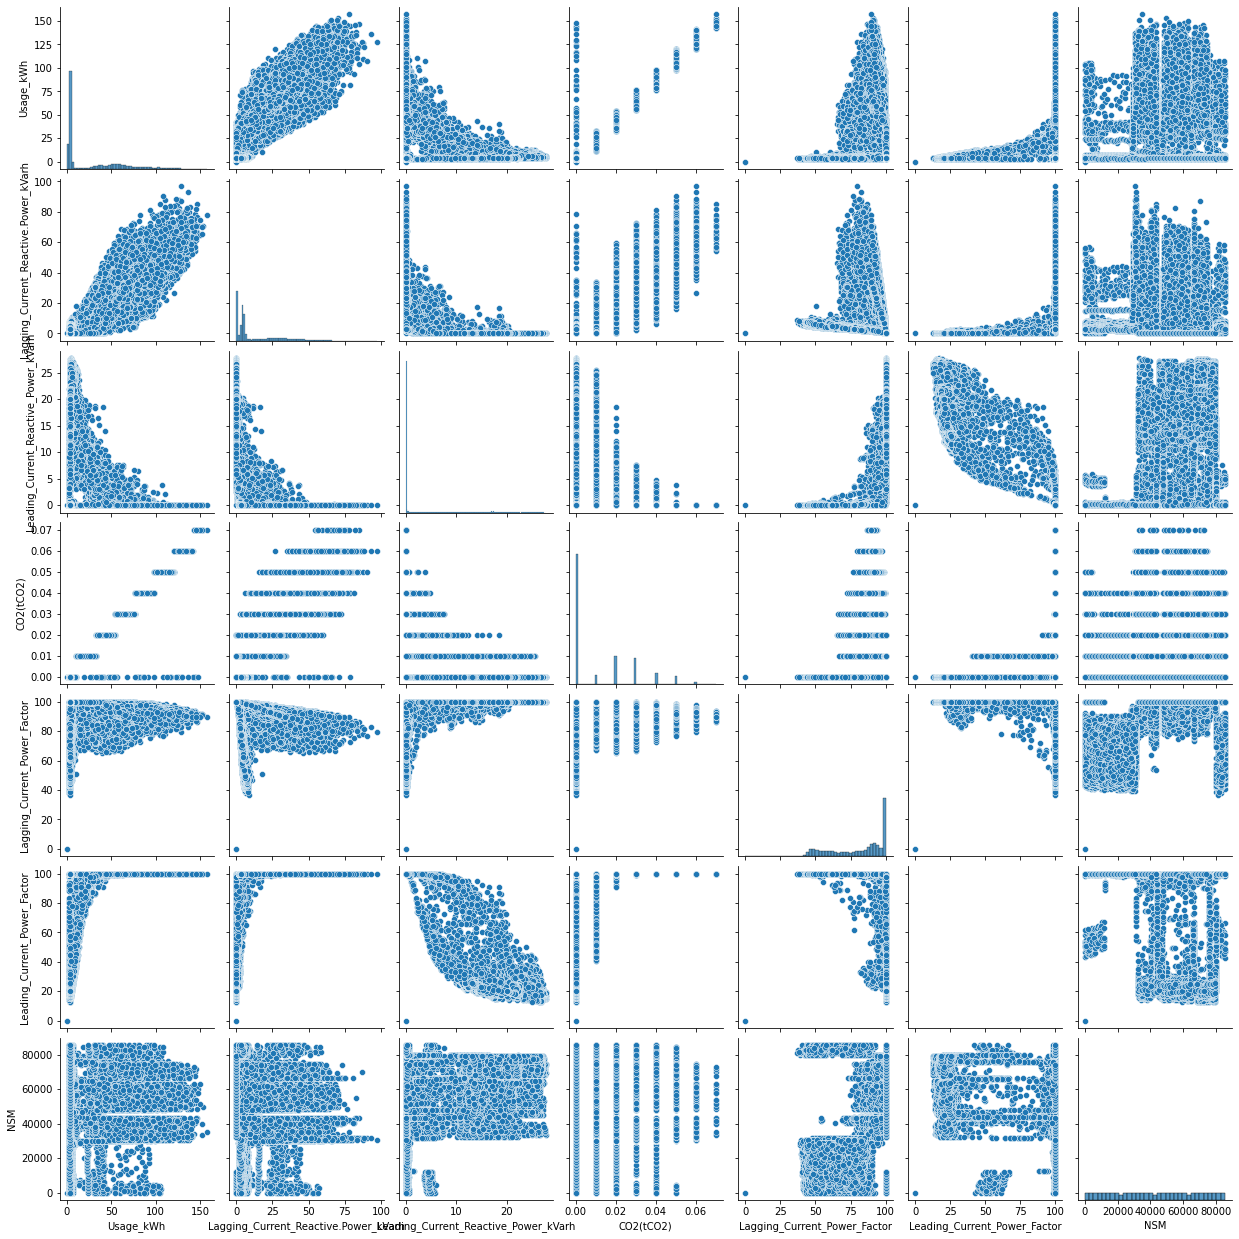

In [6]:
#EDA: pairplot

sns.pairplot(steeldata)

In [7]:
# Assign X and Y variables

X = steeldata.drop(['Usage_kWh','Leading_Current_Reactive_Power_kVarh','Day_of_week','Load_Type','WeekStatus','date'],axis=1)
y = steeldata['Usage_kWh']

In [8]:
steeldata.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split

# Split data into text/train set (70/30 split) and shuffle

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

regressor = LinearRegression()

In [23]:
#Fitting model with training data

regressor.fit(X, y)

LinearRegression()

In [24]:
regressor.intercept_

-10.629901710276503

In [13]:
# Find X coefficients

regressor.coef_

array([2.97635743e-01, 1.68771422e+03, 1.29062467e-01, 4.57302810e-02,
       1.00485345e-05])

### Predicting test set result

The model trained and ready to predict the output of new observations. The Analysis provides test sets to the model and check its performance.

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([128.52692999,  68.04636664,  65.05173908, ...,  46.93348565,
         3.92608244,  64.43464272])

In [32]:
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison_df

,Actual,Predicted
11459,139.03,128.526930
11086,67.43,68.046367
6206,73.69,65.051739
550,3.38,3.770859
27758,3.06,1.757799
...,...,...
32573,3.46,5.351259
32594,7.02,4.258105
28670,49.10,46.933486
14669,3.67,3.926082


### Checking the residuals

In [33]:
residuals = y_test - y_pred
residuals

11459    10.503070
11086    -0.616367
6206      8.638261
550      -0.390859
27758     1.302201
           ...    
32573    -1.891259
32594     2.761895
28670     2.166514
14669    -0.256082
18568    -9.244643
Name: Usage_kWh, Length: 10512, dtype: float64

Text(0, 0.5, 'Predictions')

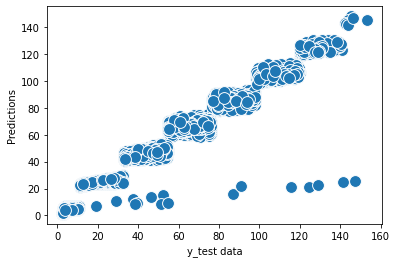

In [34]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred, ci=None, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

### R Squared(R2

R2, coefficient of determination or goodness of fit score regression function

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9798477684079083


In [37]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, regressor.predict(X_train))
print("Training data: %.2f" % mae_train)

mae_test = mean_absolute_error(y_test, regressor.predict(X_test))
print("Test data: %.2f" % mae_test)

Training data: 2.61
Test data: 2.65


In [14]:
#Saving Modelto disk

pickle.dump(regressor, open('model.pkl','wb'))

In [45]:
# Loading model to compare the results

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[3.02, 0.0, 77.72, 99.98, 0]]))

[4.87180668]


In [16]:
X

,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,2.95,0.0,73.21,100.00,900
1,4.46,0.0,66.77,100.00,1800
2,3.28,0.0,70.28,100.00,2700
3,3.56,0.0,68.09,100.00,3600
4,4.50,0.0,64.72,100.00,4500
...,...,...,...,...,...
35035,4.86,0.0,62.10,100.00,82800
35036,3.74,0.0,70.71,100.00,83700
35037,3.17,0.0,76.62,99.98,84600
35038,3.06,0.0,77.72,99.96,85500


In [43]:
steeldata.tail(2)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [40]:
X.columns

Index(['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')

In [41]:
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64